In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("panel_df_final.csv")



In [3]:
df.head()

statefips        date  employment  spend_all  covid_severity  is_red_state  \
0          4  2020-03-01    0.008250    -0.0268         0.00000           0.0   
1          6  2020-03-01    0.011300    -0.0333         0.06070           0.0   
2         17  2020-03-01    0.000879    -0.0481         0.00789           0.0   
3         25  2020-03-01   -0.007770    -0.0159         0.00000           0.0   
4         31  2020-03-01   -0.020400    -0.0728         0.10300           1.0   

   StayAtHome_Active  BizClosure_Active  SchoolClosure_Active  \
0                  0                  0                     0   
1                  0                  0                     0   
2                  0                  0                     0   
3                  0                  0                     0   
4                  0                  0                     0   

   Red_State_Policy_Interaction  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0

In [6]:
print(df.columns.tolist())


['statefips', 'date', 'employment', 'spend_all', 'covid_severity', 'is_red_state', 'StayAtHome_Active', 'BizClosure_Active', 'SchoolClosure_Active', 'Red_State_Policy_Interaction']


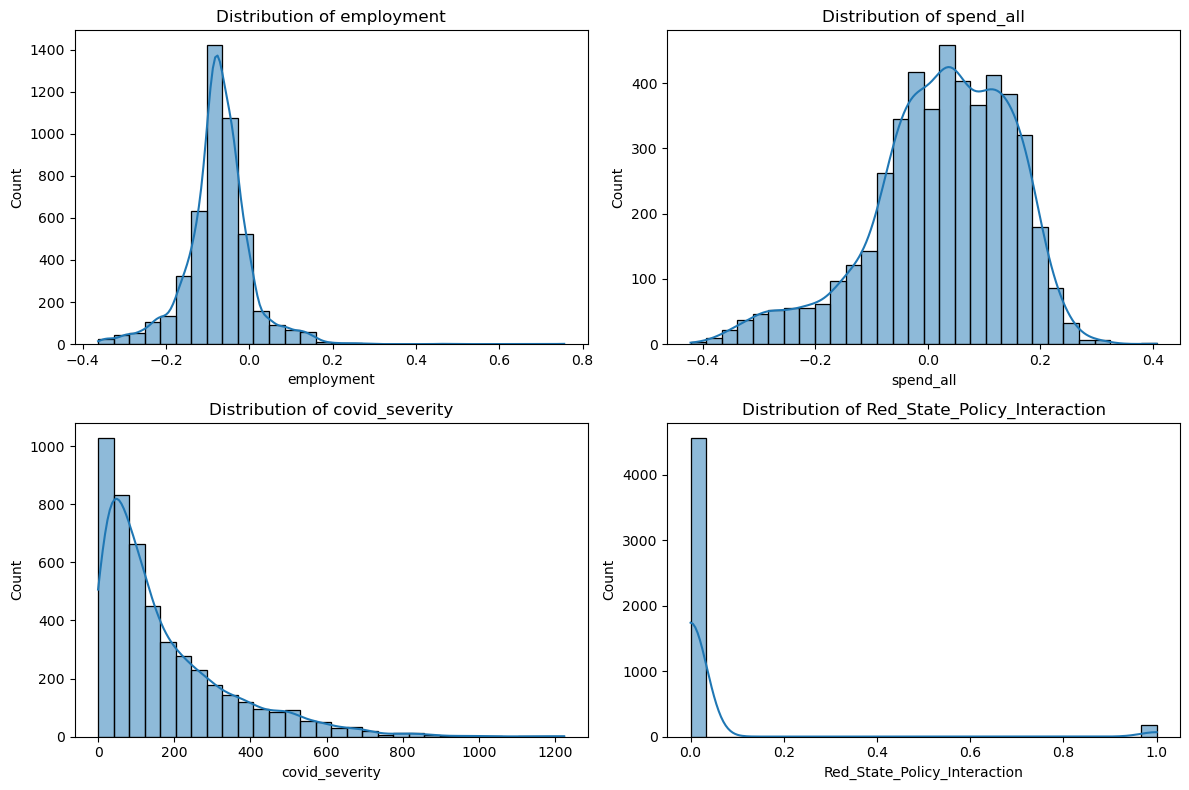

In [15]:
#  Numeric features summary 
num_cols = ['employment','spend_all','covid_severity','Red_State_Policy_Interaction']

fig, axes = plt.subplots(2, 2, figsize=(12,8)) 
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


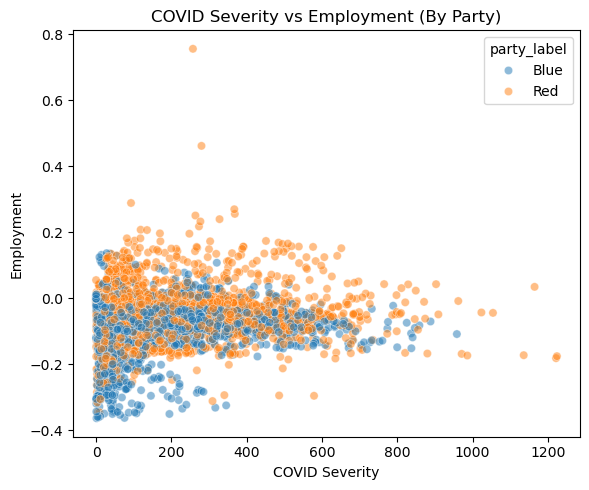

In [20]:
# Scatter covid vs employment by party
plt.figure(figsize=(6,5))
sns.scatterplot(data=df.sample(min(len(df), 5000), random_state=42), 
                x='covid_severity', y='employment', hue='party_label', alpha=0.5)
plt.title("COVID Severity vs Employment (By Party)")
plt.xlabel("COVID Severity"); plt.ylabel("Employment")
plt.tight_layout(); plt.show()

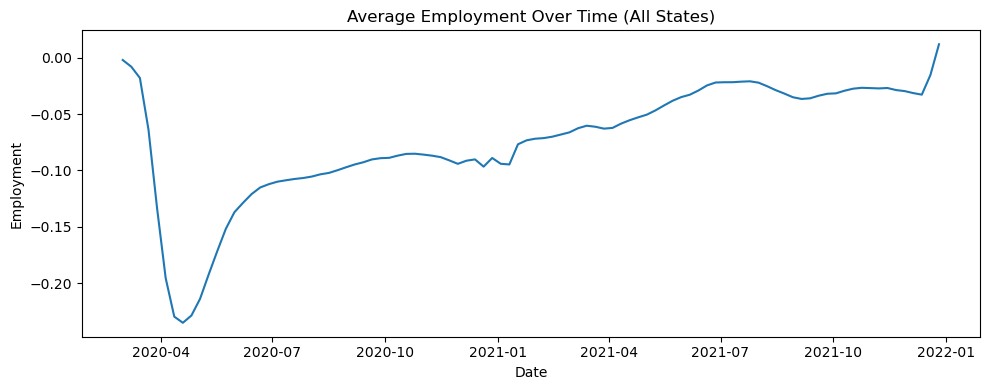

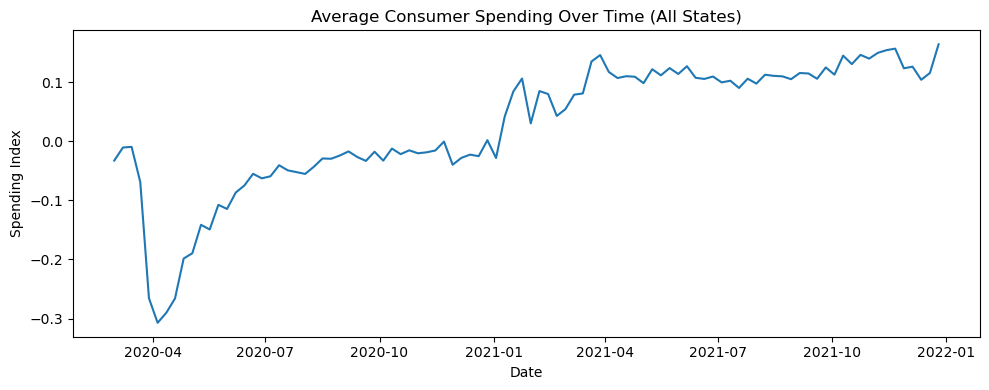

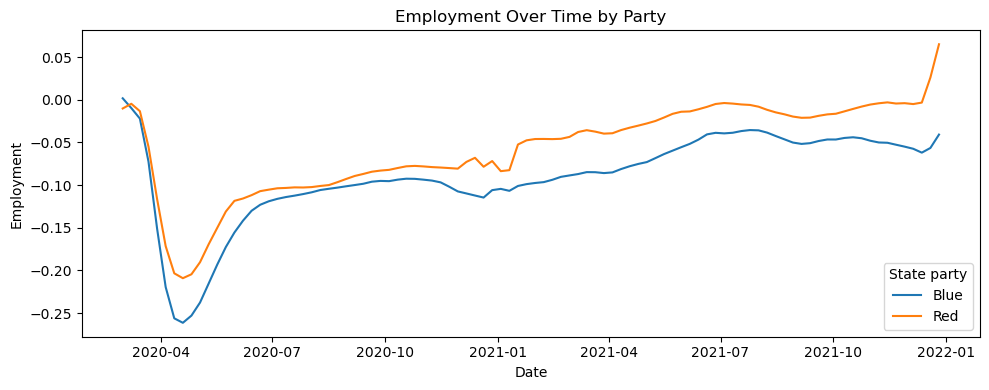

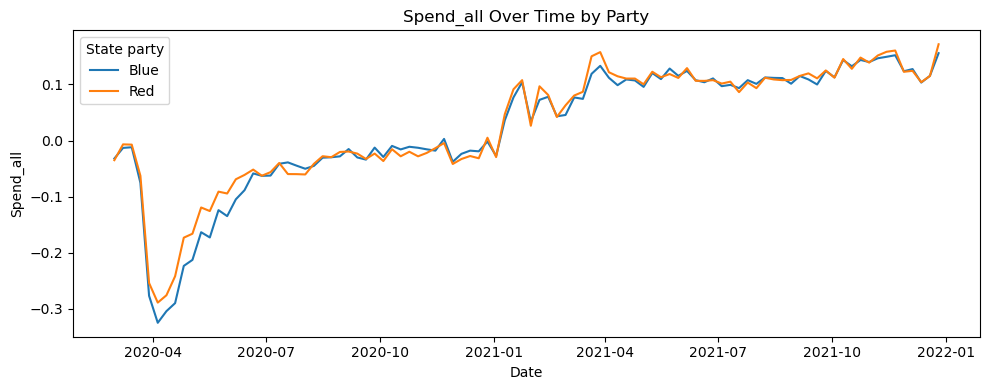

In [17]:
 

# Overall trends
daily_avg = df.groupby('date')[['employment','spend_all','covid_severity']].mean().reset_index()

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(daily_avg['date'], daily_avg['employment'])
ax.set_title("Average Employment Over Time (All States)")
ax.set_xlabel("Date"); ax.set_ylabel("Employment")
plt.tight_layout(); plt.show()

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(daily_avg['date'], daily_avg['spend_all'])
ax.set_title("Average Consumer Spending Over Time (All States)")
ax.set_xlabel("Date"); ax.set_ylabel("Spending Index")
plt.tight_layout(); plt.show()

# Trends by party (red vs blue)
df['party_label'] = np.where(df['is_red_state']==1, 'Red', 'Blue')
party_trend = df.groupby(['date','party_label'])[['employment','spend_all']].mean().reset_index()

for col in ['employment','spend_all']:
    plt.figure(figsize=(10,4))
    sns.lineplot(data=party_trend, x='date', y=col, hue='party_label')
    plt.title(f"{col.capitalize()} Over Time by Party")
    plt.xlabel("Date"); plt.ylabel(col.capitalize())
    plt.legend(title="State party")
    plt.tight_layout(); plt.show()
